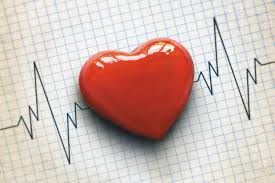

# Giới thiệu



**Dữ liệu này bắt đầu từ năm 1988 và bao gồm 4 databases : Cleveland, Hungary, Switzerland, and Long Beach V.
Nó có 76 thuộc tính bao gồm thuộc tính được dự đoán, nhưng bản thí nghiệm được công bố chỉ sử dụng 14 trong số đó.
Cột "target" dùng để chỉ khả năng bệnh tim của bệnh nhân đó (0 nếu bệnh và 1 nếu ngược lại.)**





In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## **Thông tin các cột**


* **age**: tuổi của bệnh nhân


* **sex**: Gioi tính của bệnh nhân ( 1 = nam, 0 = nữ )

* **cp**: Kiểu đau ngực 

        0: không có triệu chứng
        1: đau thắt ngực không điển hình 
        2: không đau thắt ngực
        3: đau thắt ngực điển hình

* **trestbps**: Huyết áp khi nghỉ ngơi (mm Hg khi nhập viện)

* **chol**: Đo cholesterol tính bằng mg / dl

* **fbs**: Đường huyết lúc đói của người đó (> 120 mg / dl, 1 = true; 0 = false)

* **restecg**:  Đo điện tâm đồ khi nghỉ ngơi 
        0 = bình thường
        1 = có bất thường sóng ST-T 
        2 = hiển thị phì đại thất trái có thể xảy ra hoặc xác định theo tiêu chuẩn của Estes

* **thalach**: Nhịp tim tối đa của một người đạt được

* **exang**: Đau thắt ngực do tập thể dục ( 1 = có; 0 = không )

* **oldpeak**: ST trầm cảm gây ra do tập thể dục liên quan đến nghỉ ngơi (‘ST’ liên quan đến các vị trí trên đồ thị ECG)

* **slope**: độ dốc của đoạn ST tập thể dục đỉnh cao 
        0: dốc xuống 
        1: phẳng
        2: lên cao


* **ca**: số lượng các mạch chính liên quan đến bệnh tim (0-3)


* **thal**: Một chứng rối loạn máu được gọi là thalassemia 
        0: NULL (bị loại bỏ từ tập dữ liệu trước đó)
        1: khuyết tật cố định (không có lưu lượng máu ở một số phần của tim)
        2: lưu lượng máu bình thường
        3: khuyết tật có thể hồi phục (quan sát thấy dòng máu chảy nhưng không bình thường)

* **target**: Chuẩn đoán bệnh( 0 = bị bệnh , 1 = không bệnh )




## **1. Tiền xử lý dữ liệu, in ra những thông tin cơ bản của dữ liệu (ví dụ: số lượng cột, số lượng record, số missing value, …)**

In [5]:
# Load các hàm thư viện

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [6]:
# Xuất ra 5 dòng đầu và cuối của dữ liệu.
path = '/content/13_heart.csv'
data = pd.read_csv(path)

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:

thal_NUll = data[data['thal']   == 0].index
data.drop(thal_NUll , inplace = True)
data.shape

(301, 14)

In [9]:
print(' Dữ liệu có '+ str(data.shape[0])+ ' dòng')
print(' Dữ liệu có '+ str(data.shape[1])+ ' cột')

 Dữ liệu có 301 dòng
 Dữ liệu có 14 cột


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [11]:
print('Missing value : ')
print(data.isna().sum())
print('-'*50)
print('Duplicated rows =',data.duplicated().sum())

Missing value : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
--------------------------------------------------
Duplicated rows = 1


In [12]:
def drop_Duplicate(data):
    rows = data.shape[0]
    data.drop_duplicates(subset = data.columns.values[:-1], keep = 'first', inplace = True)
    print(rows-data.shape[0], ' duplicates Rows have been removed')
    return data
    
data = drop_Duplicate(data)

1  duplicates Rows have been removed


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,0.683333,0.963333,131.626667,246.743333,0.146667,0.526667,149.663333,0.326667,1.046667,1.396667,0.723333,2.330000,0.543333
std,9.076720,0.465953,1.032250,17.619557,51.837514,0.354364,0.526192,22.889658,0.469778,1.163760,0.616920,1.008387,0.585014,0.498951
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000




```
25% mẫu khoảng 61 tuổi trở lên. 50% mẫu có mức cholesterol lên đến 240.
```




### Tìm các loại giá trị trong từng cột của dữ liệu, nếu số loại giá trị của cột đó thấp hơn 4 thì đó là cột categotical

In [14]:
categorical_col = []
for i  in data.columns:
    if len(data[i].unique()) <= 4:
        categorical_col.append(i)
print(categorical_col)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']


### Sau khi tìm ra các cột categorical, ta đổi chúng sang dạng object và chuyển các số liệu trong các cột đó về đúng với tên của tương ứng của nó để dễ  trực quan. 

In [15]:

for col in categorical_col:
    data[col] = data[col].astype('object')


data['target'] = data.target.replace({1: "No_disease", 0: "Disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({3: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          0: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({0: "downsloping", 
                          1: "flat", 
                          2:"upsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "normal_blood_flow", 3:"reversible defect"})



## **2. Thống kê và vẽ biểu đồ thích hợp của các cột mà thấy cột đó quan trọng , từ đó rút ra nhận xét tương ứng.**

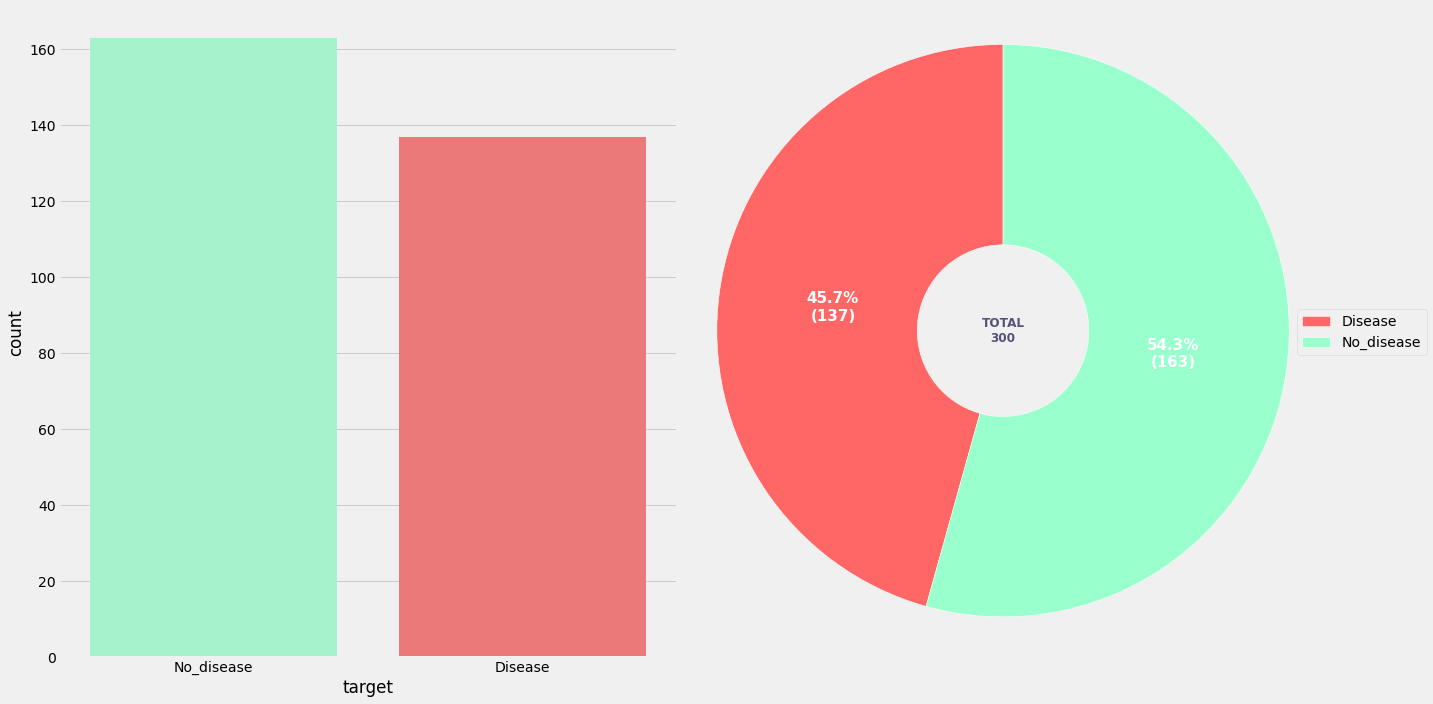

In [16]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))


sns.countplot(x = 'target', data = data, palette =['#99FFCC','#FF6666'] ,ax = ax1)


disease_patient = data[data['target']=='Disease']['target']
NoDisease_patient = data[data['target']=='No_disease']['target']

def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [disease_patient .count(),NoDisease_patient.count()]

wedges, texts, autotexts = ax2.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#FF6666','#99FFCC'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax2.legend(wedges, ['Disease','No_disease'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(data['target'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=15, weight='bold')
ax2.axis('equal')


plt.tight_layout()
plt.show()





### Dựa vào 2 biểu đồ trên ta thấy rằng số người bị bệnh tim trong tập dữ liệu này là 45% thấp hơn gần 10% so với người không bệnh.

---




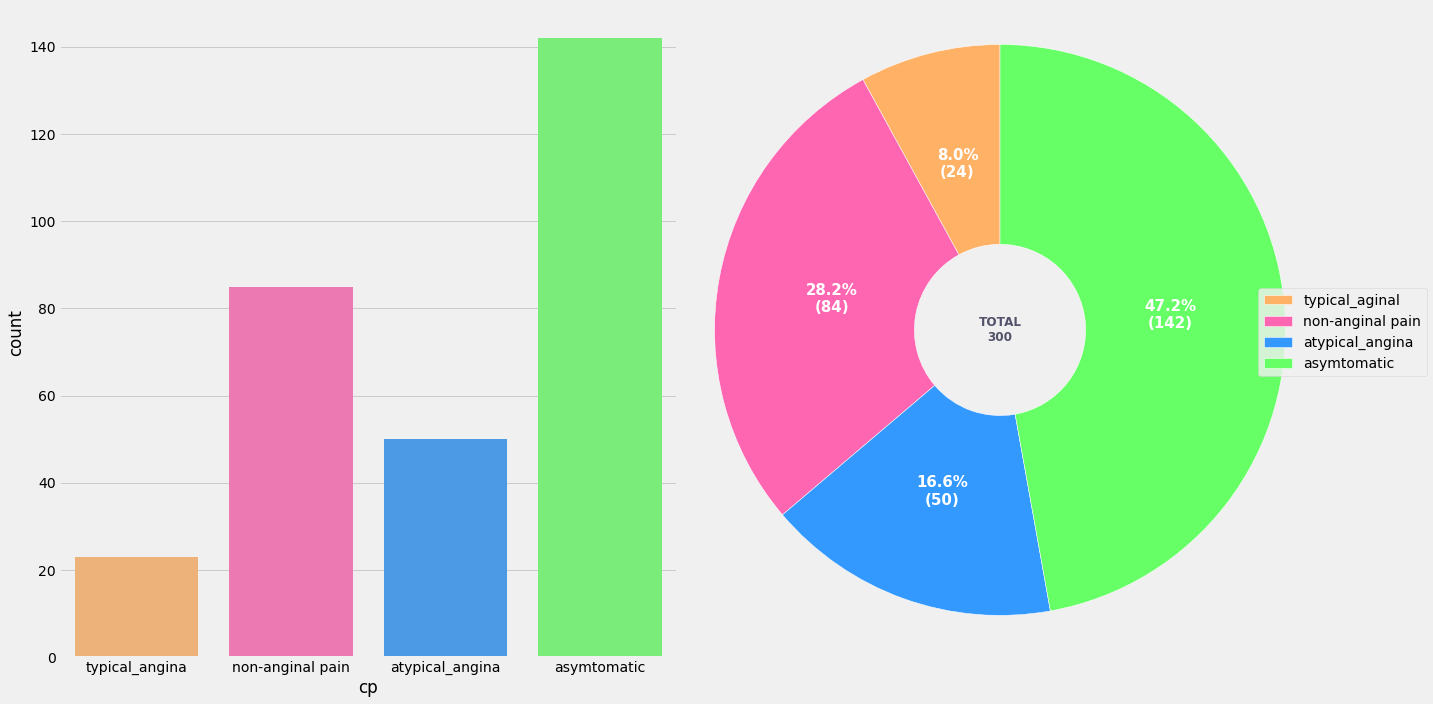

In [17]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x = 'cp', data = data, palette =['#FFb266','#FF66B2','#3399ff', '#66FF66'] ,ax = ax1)




typical_angina = data[data['cp']=="typical_angina"]['cp']
atypical_angina= data[data['cp']=='atypical_angina']['cp']
non_anginal= data[data['cp']=='non-anginal pain']['cp']
asymtomatic= data[data['cp']=='asymtomatic']['cp']


sizes = [typical_angina.count()+1,non_anginal.count(),atypical_angina.count(),asymtomatic.count()]


wedges, texts, autotexts = ax2.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#FFb266','#FF66B2','#3399ff', '#66FF66'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax2.legend(wedges, ['typical_aginal','non-anginal pain',"atypical_angina","asymtomatic"],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(data['cp'].count()),
         weight='bold', size=12, color='#52526a',
         ha='center', va='center')

plt.setp(autotexts, size=15, weight='bold')

ax2.axis('equal')  
plt.tight_layout()
plt.show()




### Trong số các bệnh nhân này, thì bệnh nhân không triệu chứng đau ngực chiếm nhiều nhất với gần 50%.

### Tiếp theo là bệnh nhân không đau thắt ngực với 29% , còn lại là các bệnh nhân đau thắt ngực điển hình và không điển hình.

---



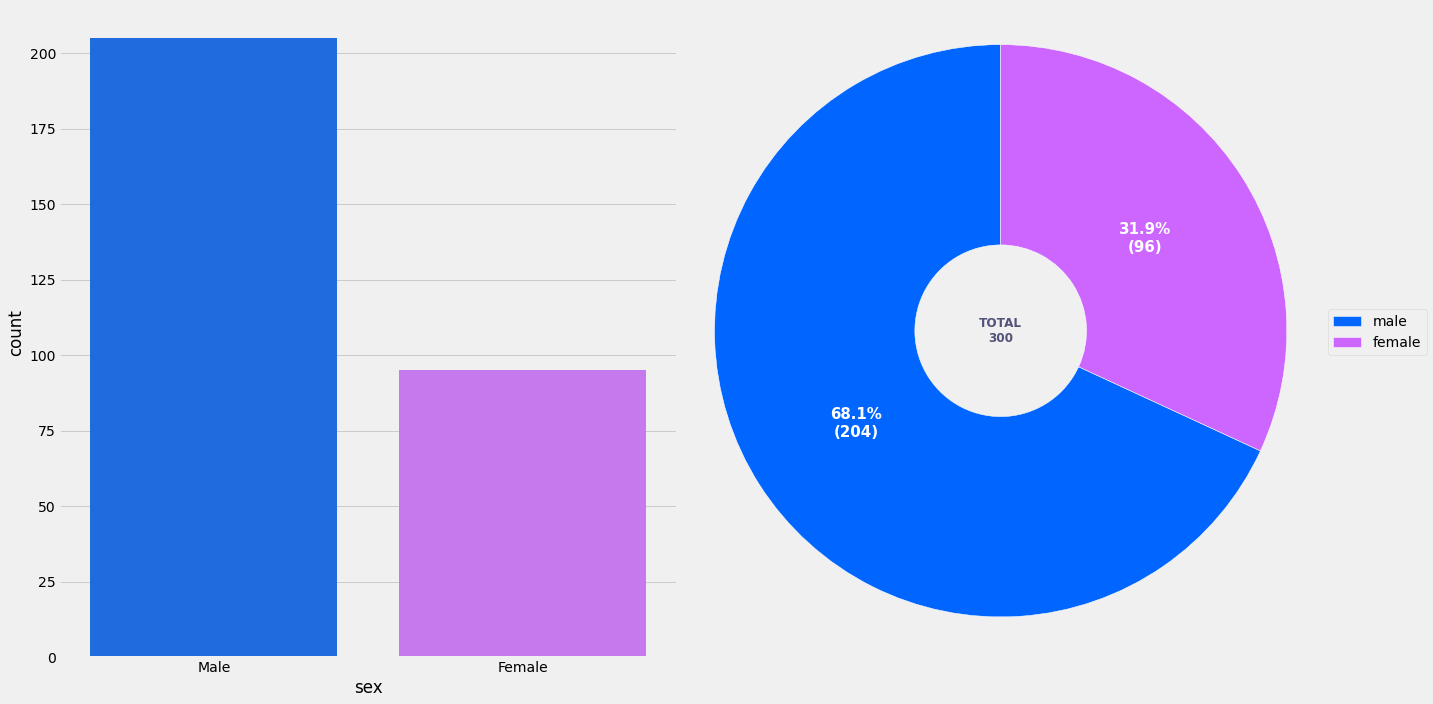

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))



sns.countplot(x = 'sex', data = data, color = 'c',palette=['#0066ff','#cc66ff'],ax = ax1)


males = data[data['sex']=='Male']['sex']
females = data[data['sex']=='Female']['sex']

sizes = [males.count(),females.count()+1] 

wedges, texts, autotexts = ax2.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax2.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(data.shape[0]),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=15, weight='bold')
ax2.axis('equal') 


plt.tight_layout()
plt.show()



### Xét về giới tính, theo tập dữ liệu đã khảo sát số lượng nam giới chiếm gần 70% tập dữ liệu gấp đôi so với số lượng nữ giới.

---



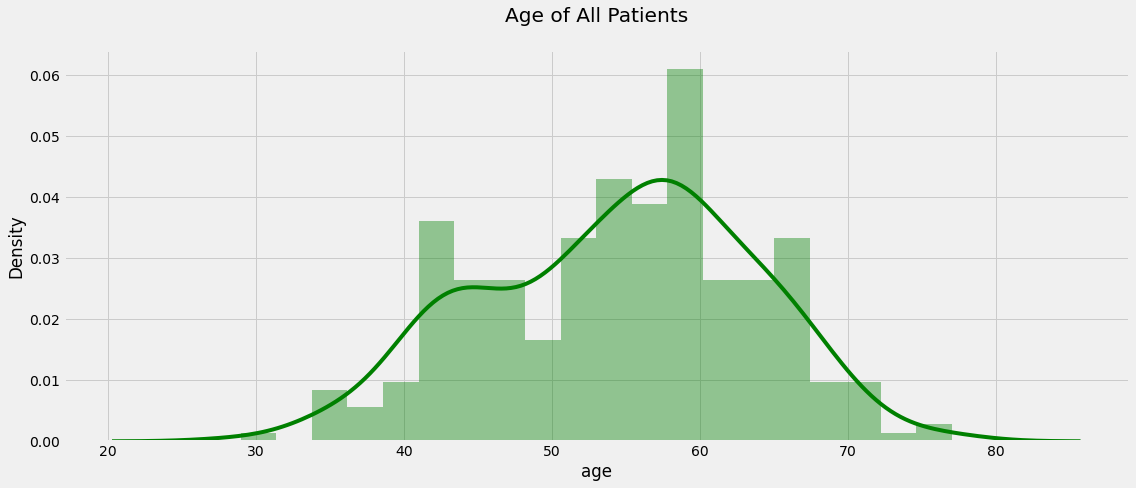

In [19]:

plt.figure(figsize = (16,7))

sns.distplot(data['age'], bins = 20, color = 'green')
plt.xticks(rotation = 0)
plt.title('Age of All Patients\n')
plt.tight_layout()
plt.show()



### Xét về độ tuổi của các bệnh nhân thì ta thấy rằng đồ thị này gần như tuân theo phân phối chuẩn và số tuổi tập trung nhiều nhất trong khoảng 50-60

---



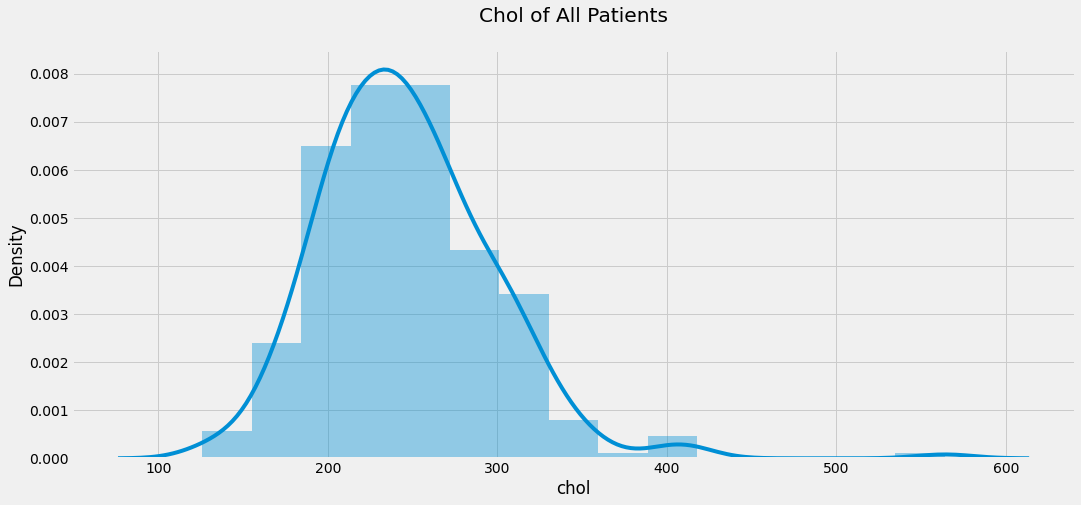

In [20]:
plt.figure(figsize=(16,7))
sns.distplot(data['chol'],kde=True,bins=15)
plt.title('Chol of All Patients\n')

plt.show()




### Đồ thị lượng Cholesterol của từng bệnh nhân cũng tuân theo phân phối chuẩn với mức chol tập trung nhiều ở khoảng 200-300

---



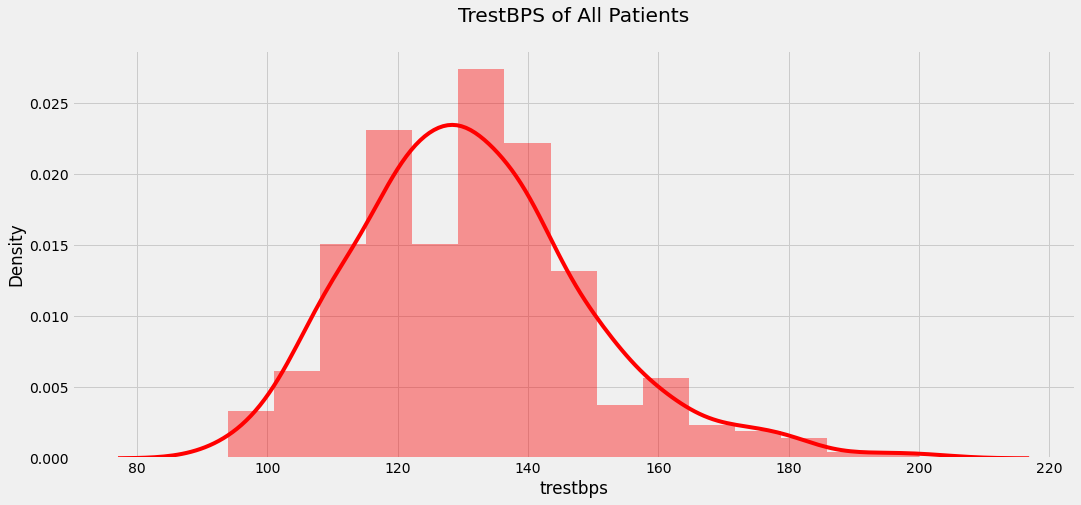

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(data['trestbps'],kde=True,bins=15, color = 'red')
plt.title('TrestBPS of All Patients\n')
plt.show()


### Còn đối với nhịp tim tối đa của từng bệnh nhân thì phần lớn rơi vào khoảng 150-175

---

## **3. Thống kê và vẽ biểu đồ thích hợp giữa các cột, từ đó rút ra nhận xét.**


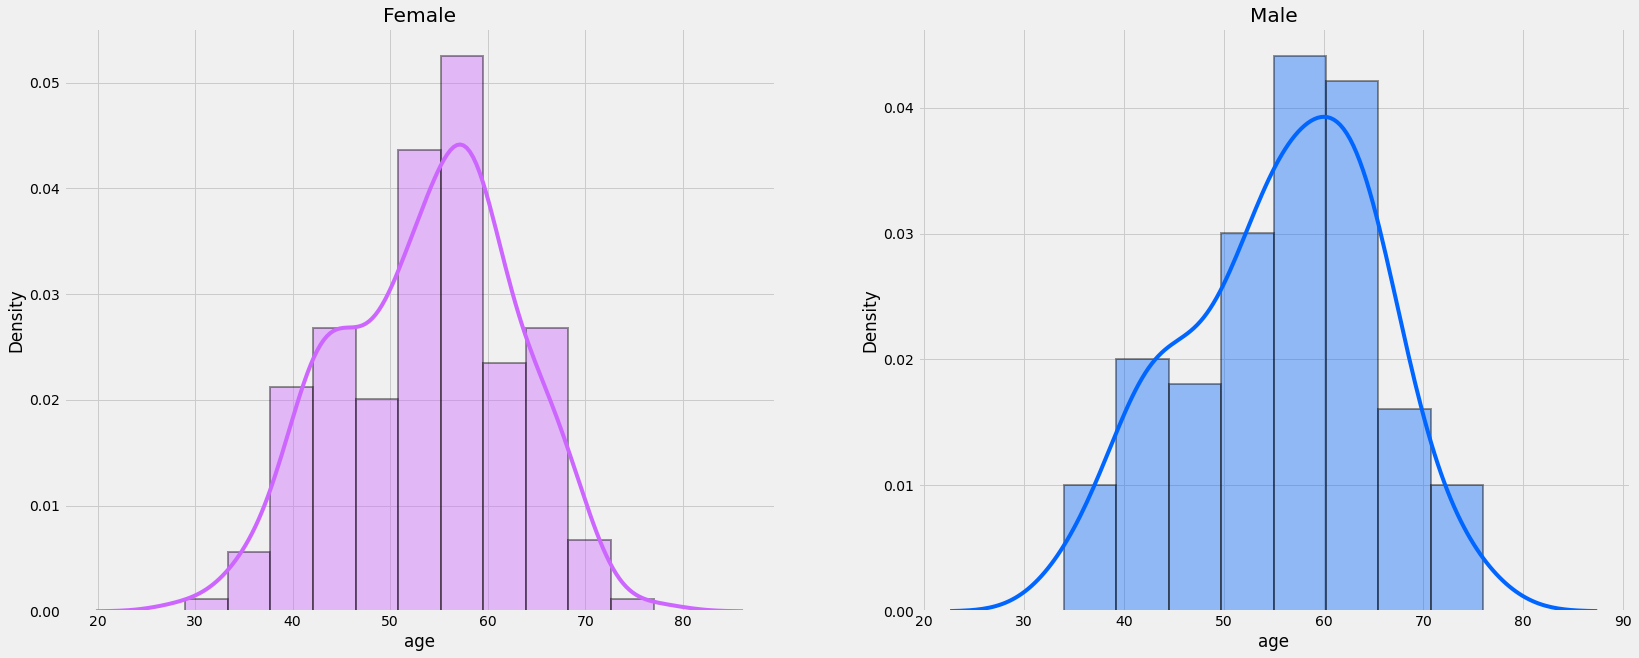

In [22]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10))



males_age = data[data['sex']=='Male']['age']
females_age = data[data['sex']=='Female']['age']


sns.distplot(males_age, kde=True, color='#cc66ff', hist_kws=dict(edgecolor="k", linewidth=2),ax = ax1)
ax2.set_title('Male')
sns.distplot(females_age, kde=True, color='#0066ff', hist_kws=dict(edgecolor="k", linewidth=2),ax = ax2)

ax1.set_title('Female')
plt.show()

### Ta nhận thấy rằng ở nam sẽ tập trung ở khoảng tuổi từ 50-65 là khoảng tuổi dễ gây bệnh tim .
### Trong khi đó , đối với nữ , mặc dù nữ chỉ chiếm 30% tập khảo sát nhưng không có nghĩa là nữ sẽ ít khả năng bệnh tim hơn nam

---



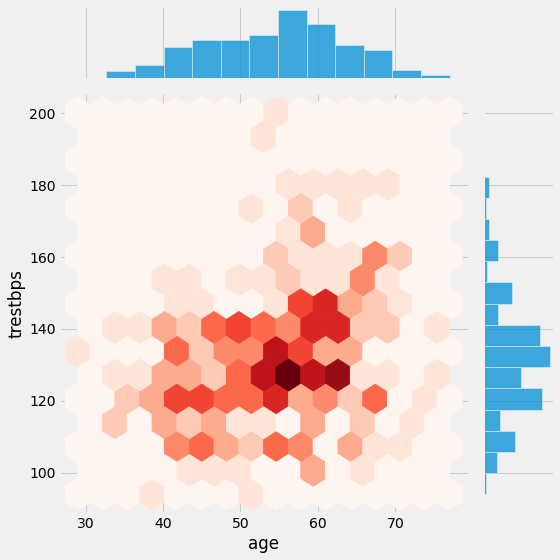

In [23]:

fig1 = sns.jointplot(data=data,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
          
              )

fig1.fig.set_figwidth(8)
fig1.fig.set_figheight(8)


plt.tight_layout()
plt.show()

### khoảng tuổi từ 50 – 60 , ta sẽ thấy rằng có khá nhiều người ở độ tuổi này có huyết áp trong khoảng 120-140 tức là huyết áp cao. Lí do là vì người lớn tuổi, hệ thống thành mạch máu không còn duy trì được độ đàn hồi như trước, dẫn đến cao huyết áp.

---



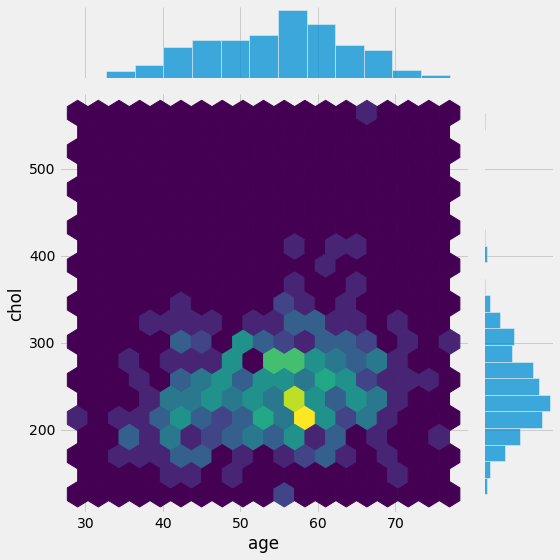

In [24]:

fig1 = sns.jointplot(data=data,
              x='age',
              y='chol',
              kind='hex',
            cmap='viridis'
              )

fig1.fig.set_figwidth(8)
fig1.fig.set_figheight(8)

plt.tight_layout()
plt.show()

### bệnh nhân trong khoảng 50-60 tuổi đa số có cholesterol là từ 240 mg/dL trở đi tức là cholesterol cao.Vì Người càng lớn tuổi thì nguy cơ mỡ máu cao càng tăng, khả năng xơ vữa động mạch và biến chứng cũng cao hơn.

---



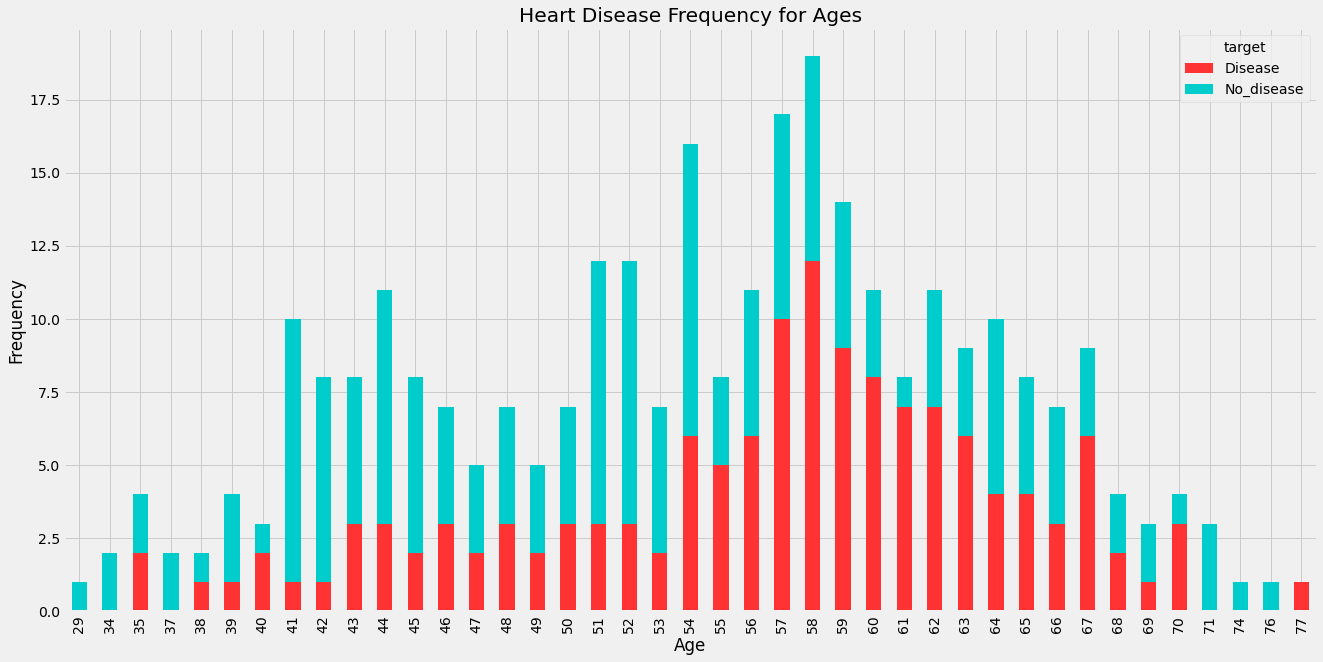

In [25]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,10), color=['#FF3333','#00CCCC'],stacked = True)


plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




### Đồ thị này biểu thị tỉ lệ người bệnh và không mắc bệnh của bệnh nhân ứng với từng số tuổi
### Cột xanh thể hiện số người không mắc bệnh , côt đỏ thể hiện người mắc bệnh
### Dựa vào hình ta nhận thấy rằng phần xanh chiếm đa số ở các cột đầu tương ứng với người trẻ
### Và cột đỏ chiếm đa số ở các cột sau tương ứng với người già 

---



<Figure size 1152x504 with 0 Axes>

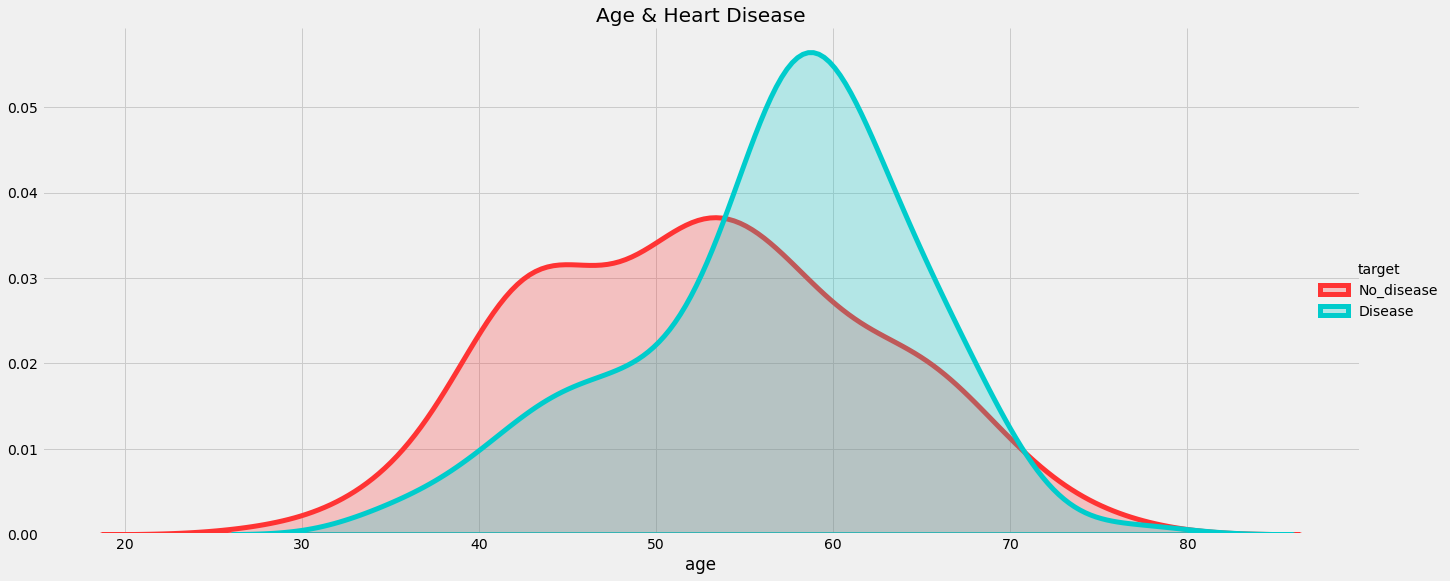

In [26]:
plt.figure(figsize = (16,7))
fig1 = sns.FacetGrid(data, hue="target", aspect=4, height =8,palette = ['#FF3333','#00CCCC'])
fig1.map( sns.kdeplot, 'age', shade=True, linewidth=5)
fig1.add_legend()

fig1.fig.set_figwidth(20)
fig1.fig.set_figheight(8)

plt.title('Age & Heart Disease')

plt.show()



### Đồ thị này cho ta thấy 1 cách khách quan hơn về hình dạng của số tuổi người mắc bệnh và không mắc bệnh
### Đối với người không mắc bệnh , họ sẽ tập trung nhiều nhất trong khoảng 40-55
### Còn người mắc bệnh sẽ tập trung ở khoảng 55 trở đi tương ứng với người lớn tuổi

---



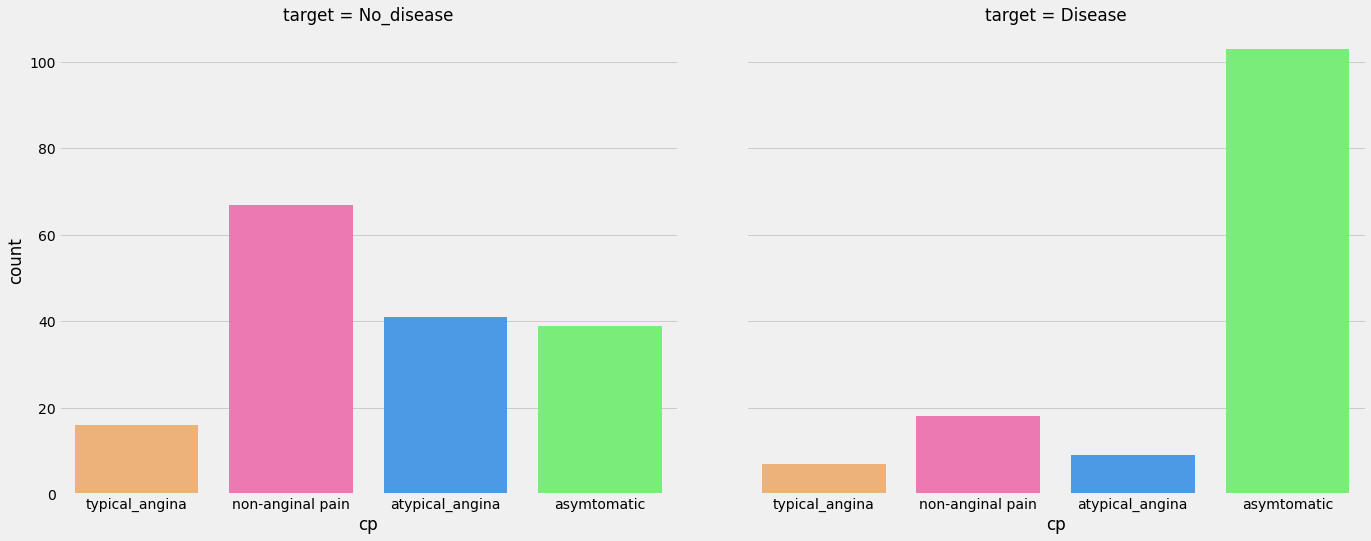

In [27]:



g= sns.catplot(x='cp', col='target', kind='count', data=data,palette= ['#FFb266','#FF66B2','#3399ff', '#66FF66'])
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.show()




### Tiếp theo là khảo sát về liên hệ giữa các bệnh về ngực và bệnh tim
### Đối với các bệnh nhân không bênh tim thì những người không đau thắt ngực chiếm số lương nhiều nhất. 
### Tức là những người không đau thắt ngực ít khả nẳng bị bệnh tim hơn những người còn lại

### Đối với những người bệnh tim , thì ta ghi nhận 1 lượng lớn các ca ghi nhận từ đau ngực không có triệu chứng 



---



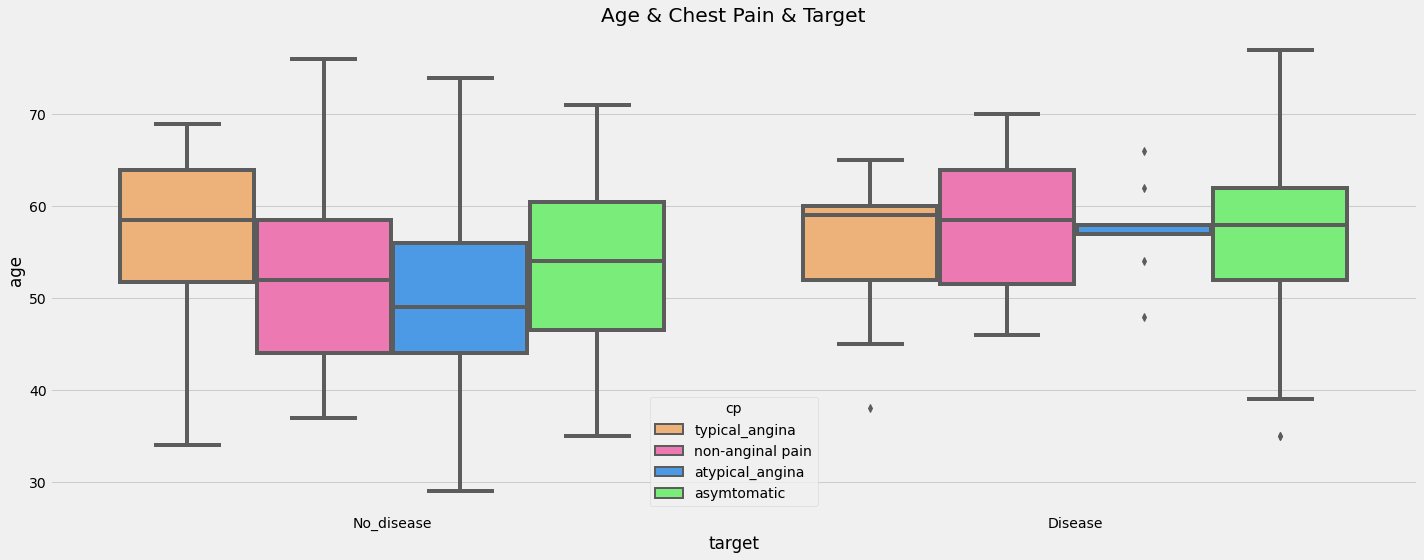

In [28]:
plt.figure(figsize = (20,8))
p1 = sns.boxplot(x = 'target',y =  'age', hue = 'cp'  ,data = data,palette= ['#FFb266','#FF66B2','#3399ff', '#66FF66'])
p1.set_title('Age & Chest Pain & Target')
plt.tight_layout()
plt.show()


### Đồ thị thể hiện mối quan hệ giữa các bệnh đau ngực, tuổi liên quan đến bệnh tim
### Ngoài việc chỉ ra các ca loại đau ngực và tuổi dẫn đến bệnh tim 
### Ta còn nhận ra rằng đối với bệnh nhân đau ngực không điển hình thì độ tuổi của phần lớn nằm trong khoảng 57-58 

---



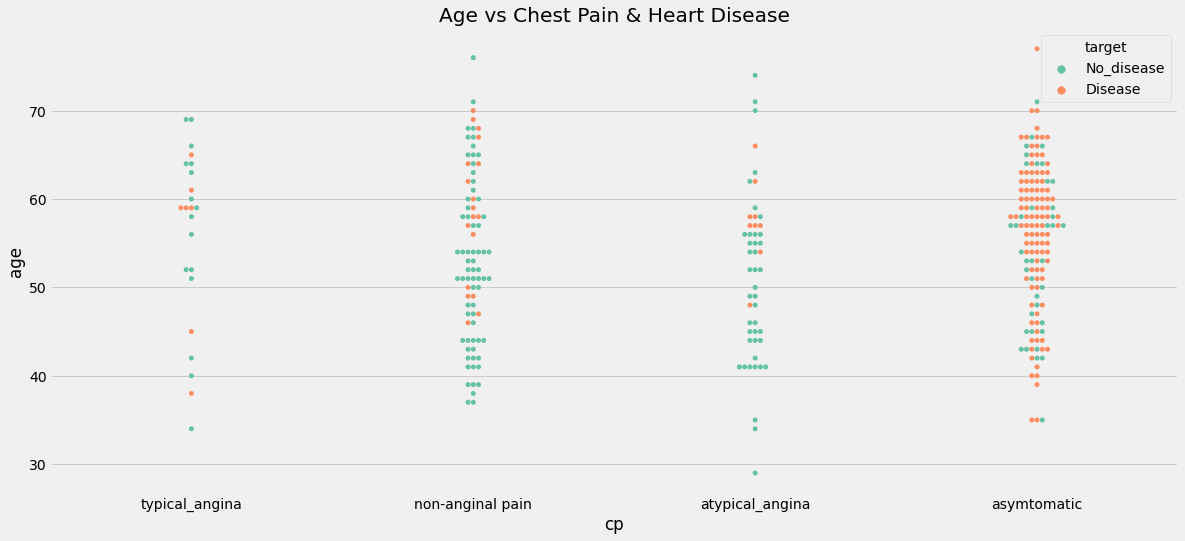

In [29]:
plt.figure(figsize=(18,8))
p1 = sns.swarmplot(x='cp', y='age', data=data, hue='target', palette='Set2')
p1.set_title('Age vs Chest Pain & Heart Disease')
plt.show()



### Theo quan sát như trên thì đồ thị này cho thấy phân bố của các bệnh nhân bị và không bị bệnh tim với từng độ tuổi và loại đau ngực
### Như các số liệu đã thấy bên trên thì bệnh nhân đau ngực không triệu chứng ghi nhận đa số các người này đều bị bệnh tim và nó xảy ra ở bất kì loại tuổi trong khảo sát

### Còn 3 loại đau ngực còn lại thì đa số xảy ra ở người tuổi cao

---



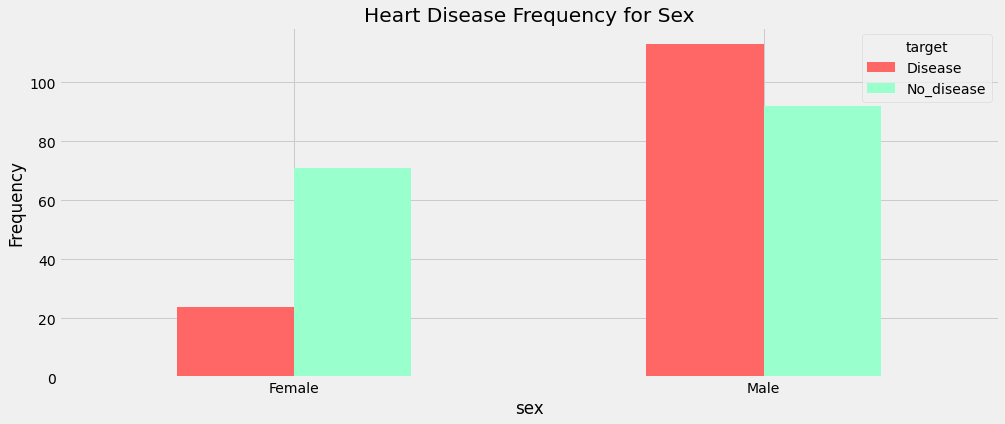

In [30]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color = ['#FF6666','#99FFCC'])
plt.title('Heart Disease Frequency for Sex')

plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()




### Còn ở đồ thị này chỉ ra số lương nam và nữ bi bệnh tim. Ta thấy rằng ở nam khả năng bệnh tim cao hơn nữ 

---



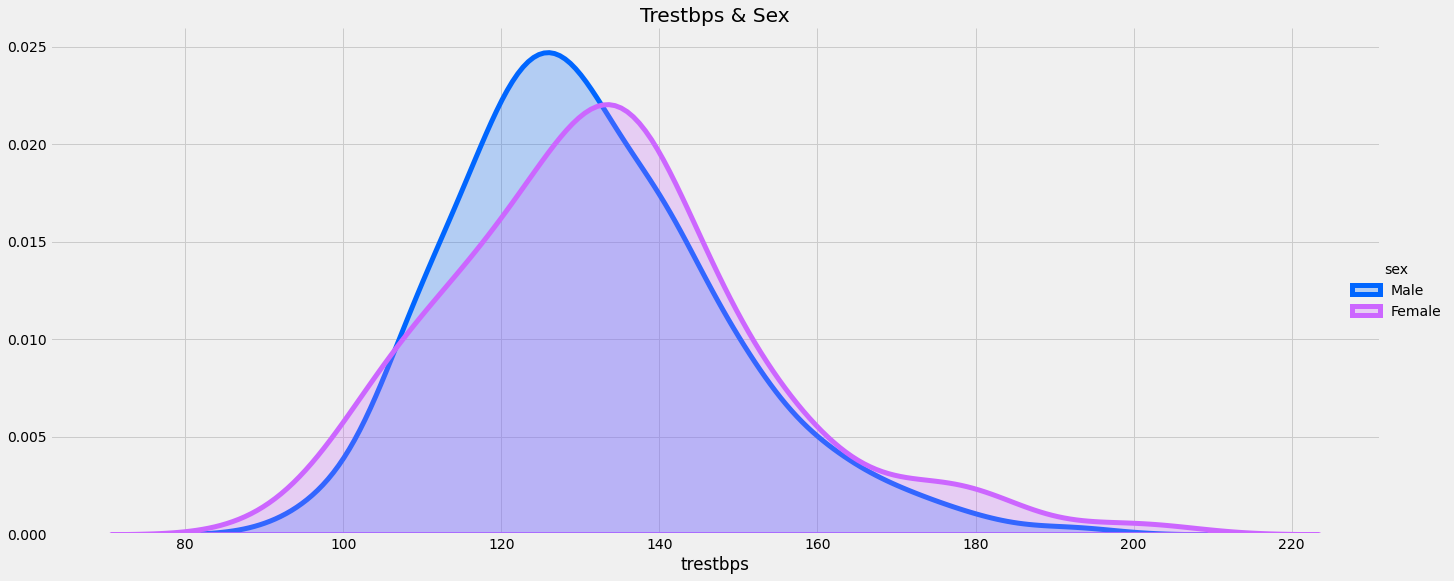

In [31]:

fig1 = sns.FacetGrid(data, hue="sex", aspect=4, height =8, palette = ['#0066ff', '#cc66ff'])
fig1.map( sns.kdeplot, 'trestbps', shade=True, linewidth=5)
fig1.add_legend()
fig1.fig.set_figwidth(20)
fig1.fig.set_figheight(8)
plt.title('Trestbps & Sex')
plt.show()


### Đồ thị này cho thấy phân phối của nhịp tim tối đa của người bệnh tim và không bệnh tim. Trong khi người bệnh tim ghi nhận nhip tim ở khoảng 125-160. Thì người không bênh tim lại ghi nhận nhịp tim ở khoảng lớn hơn là 150-190

---



Text(0.5, 1.0, 'Cholesterol & Sex')

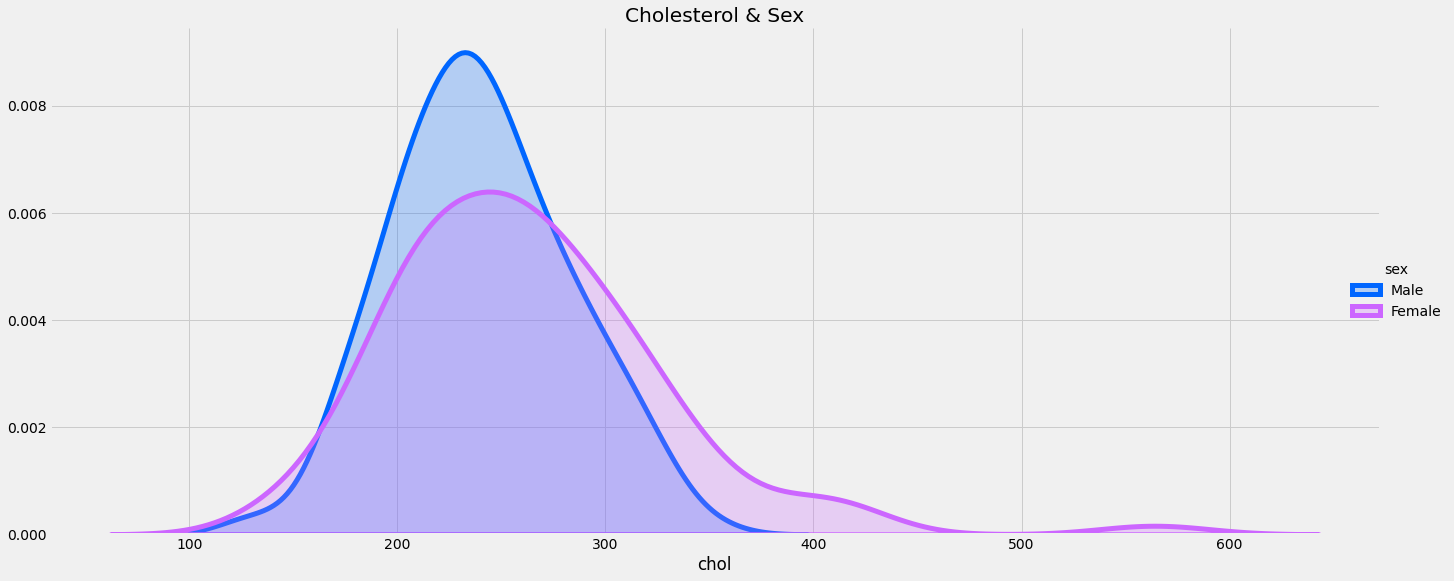

In [32]:
fig1 = sns.FacetGrid(data, hue="sex", aspect=4, height =8,palette = ['#0066ff', '#cc66ff'],)
fig1.map( sns.kdeplot, 'chol', shade=True,linewidth=5)
fig1.add_legend()
fig1.fig.set_figwidth(20)
fig1.fig.set_figheight(8)
plt.title('Cholesterol & Sex')

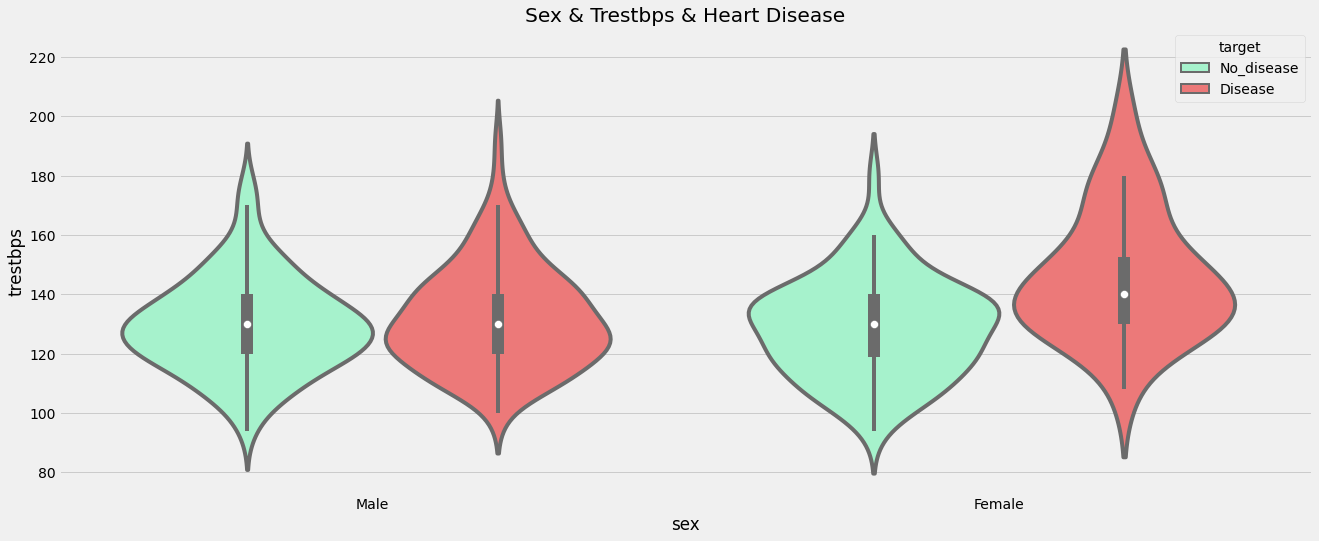

In [33]:
plt.figure(figsize = (20,8))
sns.violinplot(x = 'sex',y =  'trestbps', hue = 'target'  ,data = data,palette= ['#99FFCC','#FF6666'] )
plt.title('Sex & Trestbps & Heart Disease')
plt.show()


### Đồ thị này cho thấy ở cả 2 giới tính , thì lượng huyết áp cao hơn sẽ ghi nhận ở người bị bệnh tim.

---



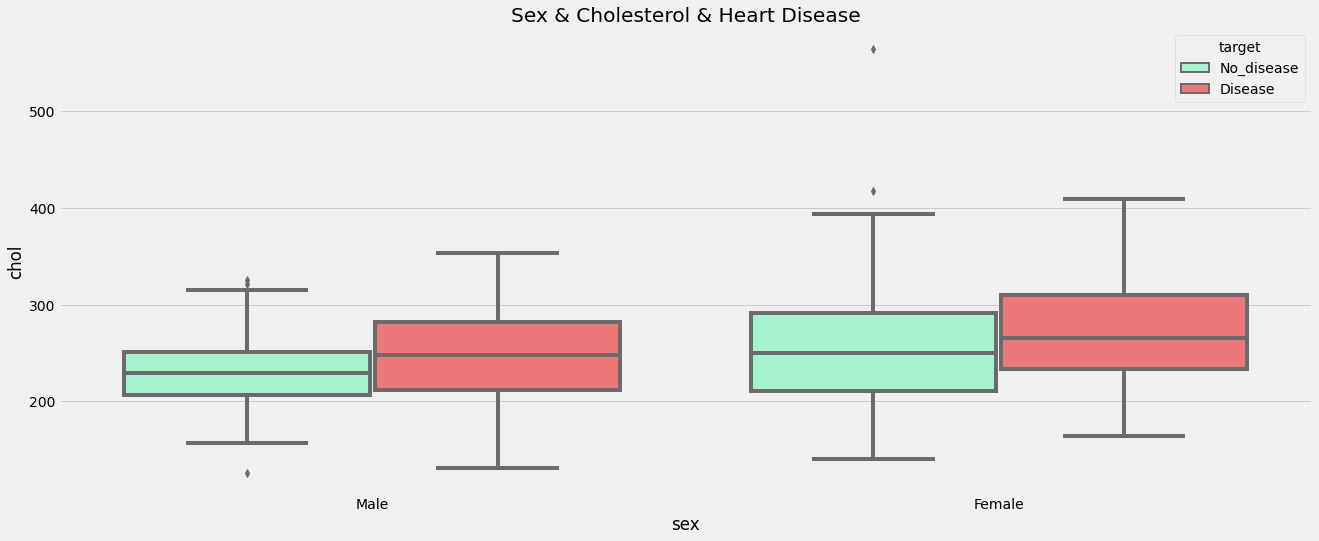

In [34]:
plt.figure(figsize = (20,8))
sns.boxplot(x = 'sex',y =  'chol', hue = 'target'  ,data = data,palette= ['#99FFCC','#FF6666'])
plt.title('Sex & Cholesterol & Heart Disease')
plt.show()


### Tương tự với lượng huyết áp , lượng cholesterol cũng ghi nhận ở tình trạng tương tự .

---



## **4. Interactive visualization( interactive temporal visualization, mapping, …)**

In [35]:
import plotly

fig = px.scatter(data, 
                 x = 'age', 
                 y = 'chol', 
                 color = 'target',
                 title='Cholesterol vs Age vs Heart Disease', 
                 template = 'plotly_dark',
                 color_discrete_sequence = ['#00CED1','#FF1493'],width = 1200, height =700
                )
fig.show()

plotly.offline.plot(fig, filename='test1.html')







'test1.html'

### Ta thấy bên hình trên , các chấm đỏ chỉ những người bị bệnh tim và chấm xanh ngược lại . Khi đó ta thấy được các chẩm đỏ tập trung đa số ở những độ tuổi cao và lượng chol của vị trí đó cũng ghi nhận ở mức lớn (>= 200).

---



In [36]:


fig = px.scatter(data, x = 'age', y = 'chol', title='Cholesterol vs Age vs Heart Disease vs Sex', 
                 facet_col = 'target', 
                 color = 'sex', template = 'plotly_dark',color_discrete_sequence = ['#00CED1','#FF1493'],width = 1200, height =700)

fig.show()


plotly.offline.plot(fig, filename='test2.html')



'test2.html'

### Đối với Nam lượng cholesterol của họ tập trung nhiều ở khoảng 200-300 nhưng những người bệnh tim thường có lượng cholesterol nhỉnh hơn. Bên cạnh đó , bệnh tim cũng xuất hiện ở những độ tuổi khá trẻ ở Nam. Đối với nữ thì lượng cholesterol có phần thấp hơn hoặc bằng nam nhưng từ khoảng tuổi 50 trở đi lượng cholesterol của họ bắt đầu tăng cao.

---



In [37]:
fig = px.scatter(data, 
                 x = 'age', 
                 y = 'trestbps', 
                 color = 'target',
                 title='Trestbps vs Age vs Heart Disease', 
                 template = 'plotly_dark',
                 color_discrete_sequence = ['#00CED1','#FF1493'],width=1200,height=700
                )
fig.show()

plotly.offline.plot(fig, filename='test3.html')



'test3.html'

### Tương tự với cholesterol, huyết áp cùng độ tuổi cao cũng chính là nguyên nhân gây ra bệnh tim. Như đồ thị trên , các chấm đỏ tập trung nhiều nhất ở khoảng tuổi 50-60 và lượng cholesterol từ 120 trở đi .

---



In [38]:
fig = px.scatter(data, x = 'age', y = 'trestbps', title='Trestbps vs Age vs Sex vs Heart Disease', 
                 facet_col = 'target', 
                 color = 'sex', template = 'plotly_dark',color_discrete_sequence = ['#00CED1','#FF1493'],width = 1200, height =700)



fig.show()

plotly.offline.plot(fig, filename='test4.html')



'test4.html'

### Tiếp tục phân tích rõ hơn khi tách nhóm trên ra thành 2 giới tính :
### Ta thấy rằng ở nam bên cạnh những người có độ tuổi cao cùng vớilượng huyết áp lớn dễ mắc bệnh hơn thì ta thấy rằng ở nhóm tuổi trẻ hơn (<= 50 ) cũng có khả năng mắc bệnh cao. Còn đối với nữ thì những người trẻ tuổi sẽ có khả nặng bị ít hơn nhưng đối với người già họ còn mắc bệnh với lượng huyết áp cao hơn cả nam.

---

